In [115]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, statsmodels.api as sm, warnings
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house_df = pd.read_sql_query('select * from houseprices', con=engine)
engine.dispose()
house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [116]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [117]:
house_df = house_df.select_dtypes(exclude=['object'])
house_df.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


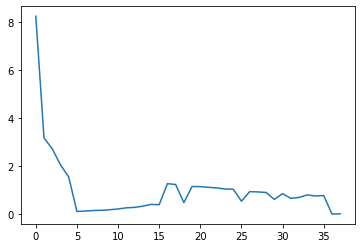

[ 8.22751477e+00  3.16203637e+00  2.70862186e+00  2.04476075e+00
  1.53682374e+00  1.02022704e-01  1.18343679e-01  1.40738565e-01
  1.51328307e-01  1.75551747e-01  2.05859021e-01  2.53618682e-01
  2.71769798e-01  3.22317971e-01  3.96118445e-01  3.84309861e-01
  1.25952280e+00  1.22417183e+00  4.71719106e-01  1.14205591e+00
  1.13641747e+00  1.10699268e+00  1.08040329e+00  1.03705496e+00
  1.02723707e+00  5.29707828e-01  9.25428948e-01  9.16278248e-01
  8.92792962e-01  6.03157868e-01  8.43759886e-01  6.45980586e-01
  6.86022515e-01  7.91844205e-01  7.47280468e-01  7.64363680e-01
 -3.32279174e-16  9.40783451e-17]


In [118]:
house_df = house_df.dropna()
X_hdf = StandardScaler().fit_transform(house_df)
Xt = X_hdf.T
Cx = np.cov(Xt)

eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
plt.plot(eig_val_cov)
plt.show()
print(eig_val_cov)

In [119]:
sklearn_pca = PCA(n_components=10)
Y_sklearn = sklearn_pca.fit_transform(X_hdf)
Y = house_df['saleprice']
X = Y_sklearn
lrm = linear_model.LinearRegression()
lrm.fit(X,Y)

print('Coefficients: ', lrm.coef_)
print('Intercept: ', lrm.intercept_)

Coefficients:  [25593.8140728  -1197.35299891  2658.69272443 -3984.16716534
 -9073.91256079 -2764.02154467   583.38265773  1862.48699324
 -6661.6632745  -2967.85657493]
Intercept:  185506.15254237287


In [120]:
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     504.3
Date:                Wed, 04 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:35:24   Log-Likelihood:                -13327.
No. Observations:                1121   AIC:                         2.668e+04
Df Residuals:                    1110   BIC:                         2.673e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.855e+05   1057.631    175.398      0.000    1.83e+05    1.88e+05
x1          2.559e+04    368.887     69.381      0.000    2.49e+04    2.63e+04
x2         -1197.3530    595.038     -2.012      0.044   -2364.879     -29.827
x3          2658.6927    642.916      4.135      0.000    1397.225    3920.160
x4         -3984.1672    739.977     -5.384      0.000   -5436.078   -2532.257
x5         -9073.9126    853.711    -10.629      0.000   -1.07e+04   -7398.843
x6         -2764.0215    943.111     -2.931      0.003   -4614.502    -913.541
x7           583.3827    956.881      0.610      0.542   -1294.116    2460.882
x8          1862.4870    990.898      1.880      0.060     -81.757    3806.731
x9         -6661.6633    992.851     -6.710      0.000   -8609.740   -4713.586
x10        -2967.8566   1006.309     -2.949      0.003   -4942.338    -993.375
==============================================================================
Omnibus:                      675.105   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102118.211
Skew:                          -1.743   Prob(JB):                         0.00
Kurtosis:                      49.628   Cond. No.                         2.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""